In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = load_iris()
X = pd.DataFrame(dataset.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(dataset.target)
y.columns=['Targets']
print(X)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


Text(0.5, 1.0, 'GMM Classification')

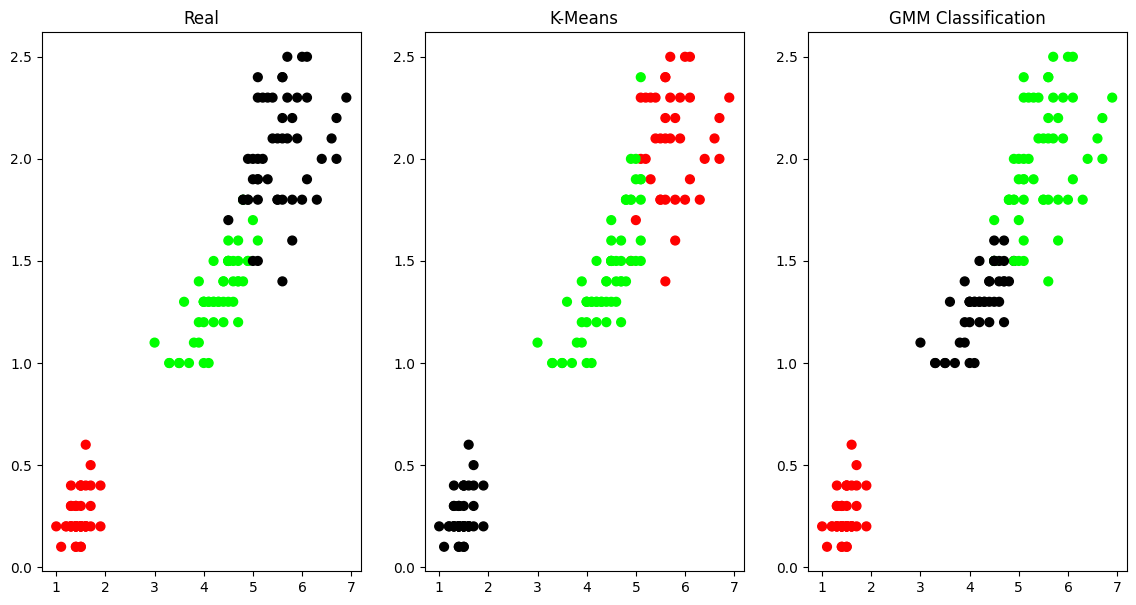

In [ ]:
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1,3,1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets],
s=40)
plt.title('Real')
plt.subplot(1,3,2)
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_, [0,1,2]).astype(np.int64)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[predY],
s=40)
plt.title('K-Means')
scalar=preprocessing.StandardScaler()
scalar.fit(X)
xsa=scalar.transform(X)
xs=pd.DataFrame(xsa, columns=X.columns)
gnm=GaussianMixture(n_components=3)
gnm.fit(xs)
predY=gnm.predict(xs)
y_cluster_gnm=gnm.predict(xs)
plt.subplot(1,3,3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[predY],
s=40)
plt.title('GMM Classification')